In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import sklearn.preprocessing as p
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import wrangle as w
import explore as e
import seaborn as sns
import acquire as a
import warnings
warnings.filterwarnings("ignore")
import env

%matplotlib inline

In [2]:
train, validate, test = w.wrangle_zillow()

In [3]:
train.shape, validate.shape, test.shape

((28817, 9), (12351, 9), (10292, 9))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28817 entries, 31793 to 25682
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   parcel_id    28817 non-null  int64  
 1   property_id  28817 non-null  int64  
 2   bathrooms    28817 non-null  float64
 3   bedrooms     28817 non-null  Int64  
 4   zip_code     28817 non-null  Int64  
 5   year_built   28817 non-null  Int64  
 6   total_sqft   28817 non-null  Int64  
 7   county       28817 non-null  object 
 8   tax_value    28817 non-null  float64
dtypes: Int64(4), float64(2), int64(2), object(1)
memory usage: 2.3+ MB


In [5]:
train.head()

,parcel_id,property_id,bathrooms,bedrooms,zip_code,year_built,total_sqft,county,tax_value
31793,11121796,1061586,3.0,4,96373,1978,2322,Los_Angeles,428575.0
52132,11242608,685818,3.0,4,97298,2007,3537,Los_Angeles,647000.0
36759,13083122,338261,2.0,4,96488,1964,1326,Los_Angeles,245335.0
27845,10999046,2433183,3.0,4,96282,1937,1774,Los_Angeles,389856.0
10940,14275253,146283,2.0,4,96981,1953,1795,Orange,571678.0


In [6]:
train.zip_code.nunique()

372

In [7]:
train.tax_value.min()

3254.0

Data looks nice and clean.  Time to explore.  Dont forget to get dummies before scaling and modeling

In [8]:
train.bedrooms.min()

2

In [9]:
train.bathrooms.min()

1.0

In [10]:
data_dictionary = pd.read_csv('zillow_data_dictionary.csv')
data_dictionary

,Unnamed: 0,Feature,Description
0,0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,2,'basementsqft',Finished living area below or partially below...
3,3,'bathroomcnt',Number of bathrooms in home including fractio...
4,4,'bedroomcnt',Number of bedrooms in home
5,5,'buildingqualitytypeid',Overall assessment of condition of the buildi...
6,6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
7,7,'calculatedbathnbr',Number of bathrooms in home including fractio...
8,8,'decktypeid',Type of deck (if any) present on parcel
9,9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + si...


In [11]:
data_dictionary.Description[-5:]

53    The assessed value of the land area of the parcel
54    The total property tax assessed for that asses...
55             The year of the property tax assessment 
56    Property taxes for this parcel are past due as...
57    Year for which the unpaid propert taxes were due 
Name: Description, dtype: object

Begin exploration

What are some questions I have of the data?

1) Which county has the highest mean tax_value?  Is county related to tax_value?
2) Does total_sqft relate to tax_value?
3) Does number of bedrooms relate to tax_value?
4) Does zip code relate to tax_value?
5) Does year_built relate to value?




Ask a question. Plot viz for initial explore.  form hypotheses and do stat test.  if relationship, include in model and final report viz

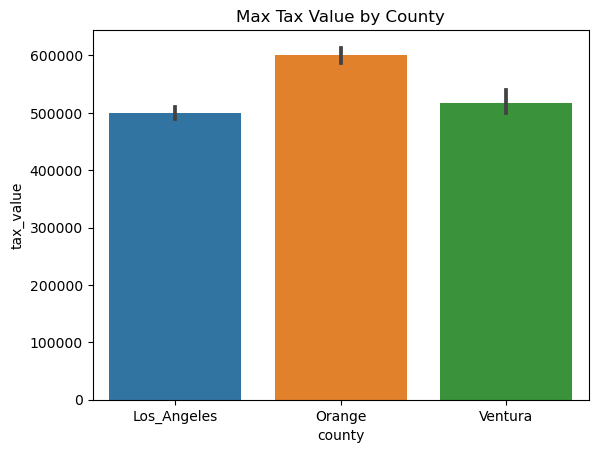

In [12]:
# 1 Which county has the highest mean tax_value?  Is county related to tax_value?
# discrete vs continuous barchart

e.plot_bar_chart(train, 'county' , 'tax_value' , 'Max Tax Value by County')

#Orange County has the highest m


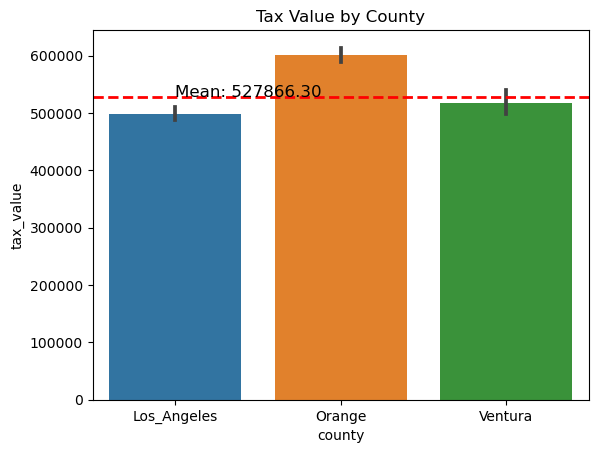

In [13]:
e.mean_bar_plot(train, 'county' , 'tax_value' , 'Tax Value by County')
#Orange county 

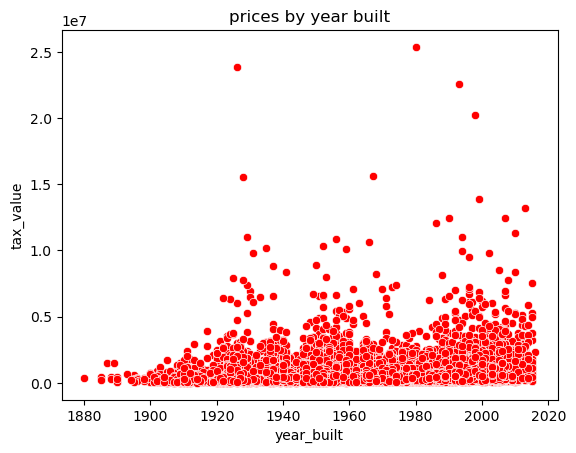

In [14]:
e.scatter_plot(train, 'year_built' , 'tax_value' , 'red' , 'prices by year built')


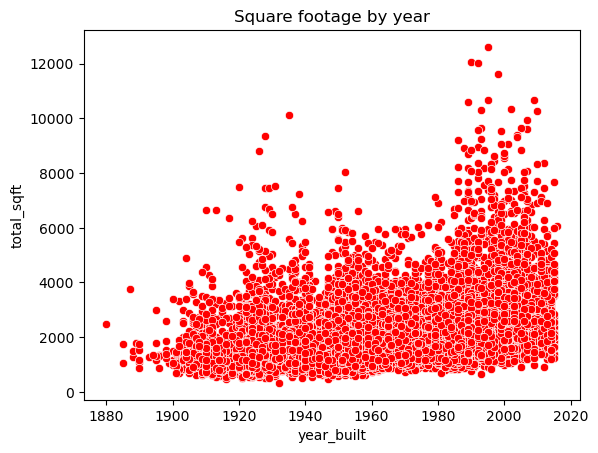

In [15]:
e.scatter_plot(train, 'year_built' , 'total_sqft' , 'red' ,'Square footage by year')
#this shows that older homes are generally smaller than newer homes
#it looks about the same as the chart above.  will make another one comparing sqft to value

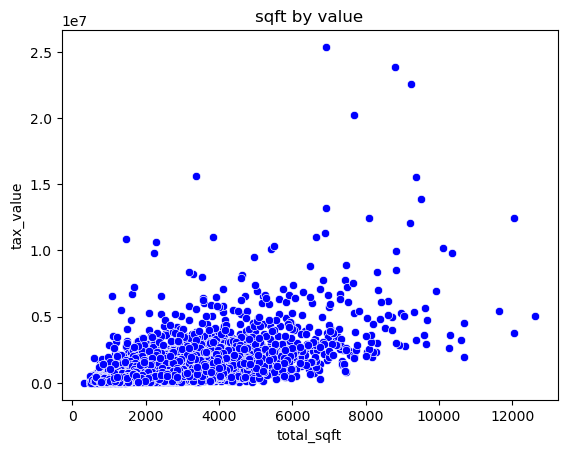

In [16]:
sqft_by_value = e.scatter_plot(train, 'total_sqft' , 'tax_value' , 'blue'  ,  'sqft by value')
sqft_by_value
#This definitely shows something.  larger sqft means higher value

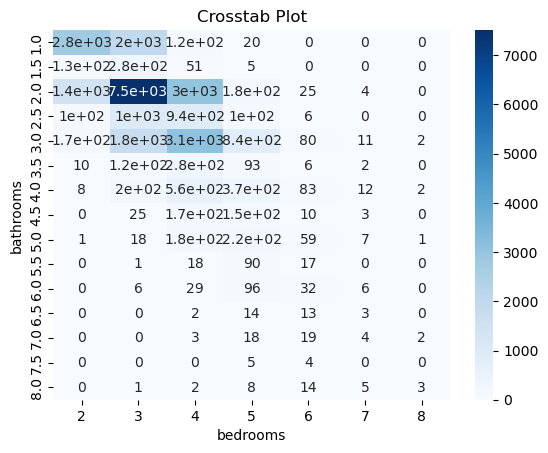

In [18]:
e.crosstab_plot(train, 'bathrooms' , 'bedrooms')